# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [824]:
import numpy as np

np.random.seed(42) # For reproducibility

def initialize_network(input_size, hidden_layers, output_size):
    # Your code should contain the weights and biases
    # provide your code

    prev_layer_size = input_size

    network = []

    for layer_idx in range(len(hidden_layers)):
        curr_layer_size = hidden_layers[layer_idx]
        
        network.append({
            "nodes": np.random.uniform(size=(curr_layer_size, prev_layer_size)),
            "bias": np.zeros((1, ))
        })

        prev_layer_size = curr_layer_size

    # adding the output layer
    network.append({
            "nodes": np.random.uniform(size=(output_size, prev_layer_size)),
            "bias": np.zeros((1, ))
        })

    return network
    

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("Jack McDonald + Initialized Network:", network)

Jack McDonald + Initialized Network: [{'nodes': array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]]), 'bias': array([0.])}, {'nodes': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451],
       [0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184]]), 'bias': array([0.])}, {'nodes': array([[0.45606998, 0.78517596, 0.19967378]]), 'bias': array([0.])}]


## Step 2: Compute Weighted Sum

In [826]:
def compute_weighted_sum(inputs, weights, bias):
    # Please numpy dot to calcuate the compute weighted with linear 
    # provide your code
    
    return np.dot(inputs, weights) + bias
    

# Test weighted sum
inputs = np.array([0.5, 0.2, 0.1])
layer = network[0]  # First layer
node_weights = layer["nodes"][0] # Weights for first node in layer
Z = compute_weighted_sum(inputs, node_weights, layer['bias'])
print("Jack McDonald + Weighted Sum:", Z)

Jack McDonald + Weighted Sum: [0.45061231]


## Step 3: Compute Node Activation

In [828]:
def sigmoid(Z):
    # provide your code
    return 1 / (1 + np.exp(-Z))


def sigmoid_derivative(A):
    # provide your code
    return A * (1 - A)


# Compute activation for the weighted sum
A = sigmoid(Z)
print("Jack McDonald + Activation:", A)

Jack McDonald + Activation: [0.61078481]


## Step 4: Perform Forward Propagation

In [830]:
def forward_propagation(inputs, network):
    # provide your code
    activations = [inputs]
    
    for layer in network:
        activations_this_layer = []
        for node in layer["nodes"]:
            activation_this_node = compute_weighted_sum(activations[-1], node, layer['bias'])
            activations_this_layer.append(sigmoid(activation_this_node)[0])
        activations.append(np.array(activations_this_layer))
    return activations


# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("Jack McDonald + Final Output:", activations[-1])

[array([0.5, 0.2, 0.1]), array([0.61078481, 0.58567939, 0.56522336, 0.61186161]), array([0.70010457, 0.71412491, 0.69945393]), array([0.7349089])]
Jack McDonald + Final Output: [0.7349089]


## Step 5: Backpropagation

In [832]:
def backpropagation(network, activations, y_true, learning_rate=0.1):
    # provide your code
    gradients = [[]]

    output_activations = activations[-1]
    
    delta_output = (output_activations - y_true) * sigmoid_derivative(activations[-1])

    for node_idx in range(len(network[-1]["nodes"])):
        output_dW = delta_output[node_idx] * output_activations
        output_db = delta_output[node_idx]
        gradients[-1].append((output_dW, output_db))

    delta = delta_output
    for layer_idx in range(len(network) - 2, -1, -1):
        gradients.append([])
        
        current_layer = network[layer_idx]
        next_layer = network[layer_idx + 1]
        next_layer_nodes = next_layer["nodes"]
        delta = np.dot(delta, next_layer_nodes) * sigmoid_derivative(activations[layer_idx + 1])

        for node_idx in range(len(network[layer_idx]["nodes"])):
            prev_activations = activations[layer_idx]

            dW = delta[node_idx] * prev_activations
            db = delta[node_idx]

            # weights and bias are updated here
            current_layer['nodes'] -= learning_rate * dW
            current_layer['bias'] -= learning_rate * db
            
            gradients[-1].append((dW, db))

    gradients.reverse()
    return gradients


# Compute gradients
y_true = np.array([1])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("Jack McDonald + Gradients:", gradients)

Jack McDonald + Gradients: [[(array([-0.00094806, -0.00037923, -0.00018961]), -0.001896126304071426), (array([-0.00069284, -0.00027714, -0.00013857]), -0.0013856870545281789), (array([-0.00062931, -0.00025172, -0.00012586]), -0.0012586210935137305), (array([-4.90000927e-04, -1.96000371e-04, -9.80001854e-05]), -0.0009800018542032542)], [(array([-0.00302048, -0.00289633, -0.00279517, -0.00302581]), -0.0049452477722077), (array([-0.00505626, -0.00484843, -0.00467909, -0.00506518]), -0.008278302618943805), (array([-0.00132405, -0.00126962, -0.00122528, -0.00132638]), -0.002167779074604626)], [(array([-0.03795398]), -0.05164446750601379)]]


## Step 6: Update Weights

In [834]:
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code

    # I did this part in the backpropagation function.
    
    pass
  

# Update weights with a learning rate of 0.1
# update_weights(network, gradients, learning_rate=0.1)

# I did this when getting the gradients.
print("Jack McDonald + Updated Network:", network)

Jack McDonald + Updated Network: [{'nodes': array([[0.37481614, 0.95082472, 0.73204915],
       [0.59893451, 0.15612905, 0.15604972],
       [0.05835963, 0.86628655, 0.60117022],
       [0.7083486 , 0.0206949 , 0.96996506]]), 'bias': array([0.00055204])}, {'nodes': array([[0.83338272, 0.21324055, 0.18269492, 0.18434625],
       [0.30518232, 0.52565787, 0.43281497, 0.29217088],
       [0.61279297, 0.1403953 , 0.2930146 , 0.36730358]]), 'bias': array([0.00153913])}, {'nodes': array([[0.45606998, 0.78517596, 0.19967378]]), 'bias': array([0.])}]


## Step 7: Visualizing Loss Changes

In [836]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


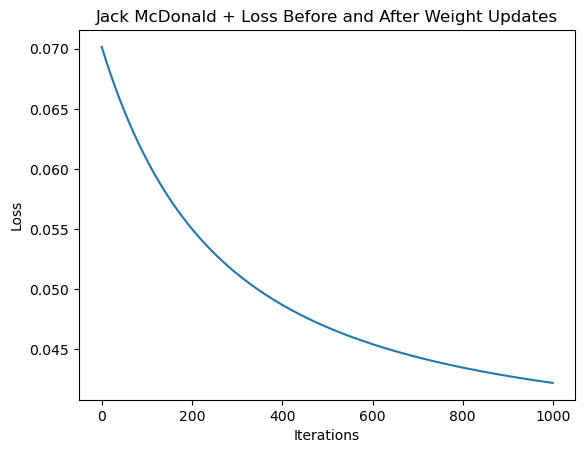

In [837]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([1])
learning_rate = 0.1

# this is for step 8
example_weight_gradient = []

for iteration in range(1000):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
    # gradients = backpropagation function
    # update_weights

    new_activations = forward_propagation(inputs, network)
    losses.append(compute_loss(y_true, new_activations[-1]))

    # this line updates the network due to passing it to backpropagation
    example_weight_gradient.append(backpropagation(network, new_activations, y_true, learning_rate)[0][0][0][0][0])
    
    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Jack McDonald + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [840]:
# Your code

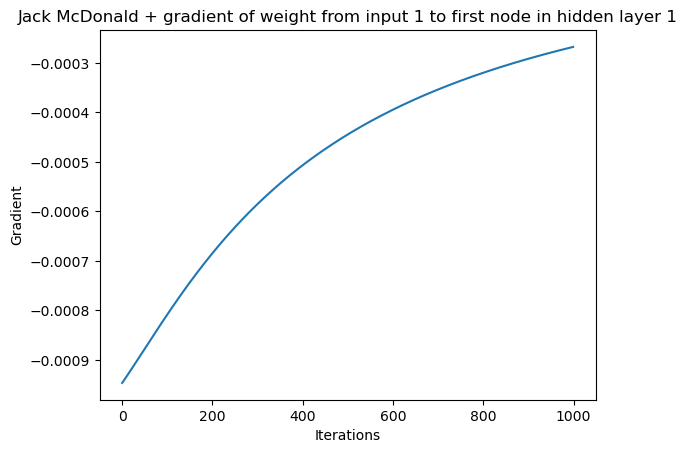

In [841]:
plt.plot(example_weight_gradient)
plt.title("Jack McDonald + gradient of weight from input 1 to first node in hidden layer 1")
plt.xlabel("Iterations")
plt.ylabel("Gradient")
plt.show()